# Data processing and visualization using python and SQL.

## 1\. Aims, Objectives and background.

### 1.1. Introduction.

According to National geographic article ([Carbon dioxide in the atmosphere is at a record high. Here's what you need to know. (nationalgeographic.com)](https://www.nationalgeographic.com/environment/article/greenhouse-gases)) Carbon dioxide, a key green house gas that drives global climate change, is continues on the rise. By trapping heat from the sun, the green house gases have kept Earth’s climate habitable for humans and other animal species. But the rising of the emission of the gases is changing drastically threating the change in climate that may not favor human existence on the earth.  

Is for the reasons in above we will be analyzing C02 emission Data of the world to try understand major sources of greenhouse gases.

### 1.2. Aims and Objectives.

Within the project I will like to explore the following:

1. Learn Basic concepts for SQL.

> > · How to create a database and tables to store our data.
> 
> > · Extract data from csv files to database (MS SQL)
> 
> > · How to create functions, view and stored procedure, that can be used for processing and extracting our data sets.
> 
> > · Quiring SQL using python. 

2. Learn basic data processing using python.

> > · Data visualization using python libaries.
> 
> > . Processing data for visualization.          

3. Data analysis goals.

> > <span style="font-family:Symbol;mso-fareast-font-family:Symbol;mso-bidi-font-family:
> > Symbol;color:#6E87A2;mso-color-alt:windowtext">·</span>**<span style="color:black;mso-color-alt:windowtext">CO2&nbsp;emissions</span>**<span style="color:black;mso-color-alt:windowtext">:&nbsp;How much does a country emit each year? What is the average emissions per person? How much has it emitted over time? How do emissions compare when we correct for trade</span><span style="font-family:&quot;Lato&quot;,sans-serif;mso-fareast-font-family:&quot;Times New Roman&quot;;
> > mso-bidi-font-family:&quot;Times New Roman&quot;;color:#6E87A2">?&lt;o:p&gt;</span>
> 
> > · **Coal, oil, gas, cement:** How much CO<span style="font-size:8.0pt;line-height:107%">2</span> comes from coal, oil, gas, flaring or cement production?
> 
> > · **Other greenhouse gases:** How much total greenhouse gases does each country emit? How much methane, and nitrous oxide is emitted?
> 
> > · **Emissions by sector:** Which sectors contribute most to emissions? Does transport contribute more or less than electricity; how large are agriculture and land use emissions?
> 
> > · **Carbon and energy efficiency:** How much energy do we use per unit of GDP? How much carbon do we emit per unit of energy?

### 1.3. Steps of the project.

1. Download csv data of C02 and Greenhouse Gas Emissions (owid-co2-data.csv) by “Our World in Data” on GitHub at:

> > Link: [owid/co2-data: Data on CO2 and greenhouse gas emissions by Our World in Data (github.com)](https://github.com/owid/co2-data).

2. Set up Microsoft SQL server in your local machine.

> > Link: [How to Download and Install SQL Server for Windows (FREE) (guru99.com)](https://www.guru99.com/download-install-sql-server.html)

### 1.4 Dataset Ethics and source.

According to “Our World in Data”, the source of our data, dataset is collected from different sources and is completely open to access. One has the permission to use, distribute and reproduce the data in any medium, provided the source and the authors are credited.

## 2\. Learning Basics of SQL

> ## <span style="font-size: 14px;">Create a database called C02DB to store our data from csv</span>

In [ ]:
-->> if drop table if exist
DROP DATABASE C0O2DB
GO
CREATE DATABASE C0O2DB
GO

> ### Create  tables

We are going to split the data into any many tables as possible for learning purposes. You can as well combine several tables that we are going to create into one or the whole data frame as one table.

For us to be able to learn SQL basics like Joins, creating views, referencing different table we will be splitting the data.

In [ ]:
/****** Object:  Table CO2_Source_Emitters_Per_Country     ******/
CREATE TABLE CO2_Source_Emitters_Per_Country(
	Source_Emitter_ID int IDENTITY(1,1) PRIMARY KEY NOT NULL,
	Country_ID int NULL,
	Gas_ID int NULL,
	Source_ID int NULL,
	Year int NULL,
	Amount float NULL,
	Source_Per_Capital float NULL,
	Cumulative float NULL,
	share_global float NULL,
	share_global_cumulative float NULL)
GO

/****** Object:  Table Countries     ******/
CREATE TABLE Countries(
	Country_ID int IDENTITY(1,1) PRIMARY KEY NOT NULL,
	iso_code varchar(50) NULL,
	Country_Name varchar(100) NULL)
GO

/****** Object:  Table CO2_SOURCES     ******/
CREATE TABLE CO2_SOURCES(
	Source_ID int IDENTITY(1,1) PRIMARY KEY NOT NULL,
	Sources_Name varchar(max) NULL)
GO


/****** Object:  Table Gases     ******/
CREATE TABLE Gases(
	Gas_ID int IDENTITY(1,1) PRIMARY KEY NOT NULL,
	Gas_Name varchar(max) NULL)

GO

/****** Object:  Table Continents_and_Regions     ******/
CREATE TABLE Continents_and_Regions(
	Continents_Regions_ID int IDENTITY(1,1) PRIMARY KEY NOT NULL,
	[Name] varchar(max) NULL)
GO

/****** Object:  Table CO2_Source_Emitters_Per_Region     ******/
CREATE TABLE CO2_Source_Emitters_Per_Region(
	Source_Emitter_ID int IDENTITY(1,1) PRIMARY KEY NOT NULL,
	Continents_Regions_ID int foreign key references Continents_and_Regions (Continents_Regions_ID) NULL,
	Gas_ID int  NULL,
	Source_ID int NULL,
	Year int NULL,
	Amount float NULL,
	Source_Per_Capital float NULL,
	Cumulative float NULL,
	share_global float NULL,
	share_global_cumulative float NULL)
GO

/****** Object:  Table Country_Gas_Emissions     ******/
CREATE TABLE Country_Gas_Emissions(
	Emissions_ID int IDENTITY(1,1) NOT NULL,
	Country_ID int foreign key references Countries(Country_ID) NULL,
	Gas_ID int foreign key references Gases(Gas_ID) NULL,
	Year int NULL,
	Amount float NULL,
	Gas_per_capita float NULL,
	Trade float NULL,
	Growth_prct float NULL,
	Growth_abs float NULL,
	Per_unit_energy float NULL,
	Cumulative float NULL,
	Trade_share float NULL,
	Share_global float NULL,
	Share_global_cumulative float NULL,
	Total_ghg float NULL,
	Ghg_per_capita float NULL,
	Total_ghg_excluding_lucf float NULL)
GO

/****** Object:  Table Country_population_gdp     ******/
CREATE TABLE Country_population_gdp(
	Country_stats_ID int IDENTITY(1,1) NOT NULL,
	Country_ID int foreign key references Countries(Country_ID) NULL,
	Population int NULL,
	Year int NULL,
	primary_energy_consumption varchar(max) NULL,
	Energy_per_capita float NULL,
	Energy_per_gdp float NULL)
GO

/****** Object:  Table Region_Gas_Emissions     ******/
CREATE TABLE Region_Gas_Emissions(
	Emissions_ID int IDENTITY(1,1) NOT NULL,
	Continents_Regions_ID int foreign key references Continents_and_Regions (Continents_Regions_ID),
	Gas_ID int NULL foreign key references Gases(Gas_ID),
	Year int NULL,
	Amount float NULL,
	Gas_per_capita float NULL,
	Trade float NULL,
	Growth_prct float NULL,
	Growth_abs float NULL,
	Per_unit_energy float NULL,
	Cumulative float NULL,
	Trade_share float NULL,
	Share_global float NULL,
	Share_global_cumulative float NULL,
	Total_ghg float NULL,
	Ghg_per_capita float NULL,
	Total_ghg_excluding_lucf float NULL)
GO

/****** Object:  Table Region_population_gdp     ******/
CREATE TABLE Region_population_gdp(
	Region_stats_ID int IDENTITY(1,1) NOT NULL,
	Continents_Regions_ID int foreign key references Continents_and_Regions (Continents_Regions_ID),
	Population int NULL,
	YEAR int NULL,
	primary_energy_consumption varchar(max) NULL,
	Energy_per_capita float NULL,
	Energy_per_gdp float NULL)
GO


> Create view

View are used to link data from different tables into one datafarame that can be used for analysis.

> Create SQL procedure.  

SQL stored procedure act more like functions. We will be using procedure to extract different data farame from our databased. You can use some select queries direct from the views but the importance of using procedures you can do some data analysis on the data before returning it.

In [ ]:
USE [CO2DB]
GO
/****** Object:  StoredProcedure [dbo].[GetCO2ByDifferentSourcesPerCountry]     ******/

create procedure [dbo].[GetCO2ByDifferentSourcesPerCountry] (@code int, @Reference varchar(max), @countryName varchar(max)) as
begin
	if(@code = 0)
	begin
		select * from vwGasEmmissionCountryStats where Gas_ID = 1
	end
	if(@code = 1)
	begin
		select * from vwGasEmmissionCountryStats where Country_ID = @Reference
	end
	if(@code = 2)
	begin
		select * from vwGasEmmissionCountryStats where Gas_ID = @Reference
	end
	if(@code = 3)
	begin
		select Sources_Name,Amount,Year,Country_Name,Gas_Name  from vwSourcesofCO2PerCountry 
	end
	if(@code = 4)
	begin
		select *  from vwGasEmmissionCountryStats where Country_Name = @countryName and Gas_ID =@Reference 
	end
end

GO
/****** Object:  StoredProcedure [dbo].[GetCO2ByDifferentSourcesPerRegion]     ******/
SET ANSI_NULLS ON
GO
SET QUOTED_IDENTIFIER ON
GO
create procedure [dbo].[GetCO2ByDifferentSourcesPerRegion] (@code int, @Reference varchar(max)) as
begin
	if(@code = 0)
	begin
		select * from vwSourcesofCO2PerRegion
	end
	if(@code = 1)
	begin
		select * from vwSourcesofCO2PerRegion where Continents_Regions_ID = @Reference
	end
	if(@code = 2)
	begin
		select * from vwSourcesofCO2PerRegion where Source_ID = @Reference
	end
end
GO
/****** Object:  StoredProcedure [dbo].[GetCountryGreenHouseGases]     ******/
SET ANSI_NULLS ON
GO
SET QUOTED_IDENTIFIER ON
GO
create procedure [dbo].[GetCountryGreenHouseGases] (@code int, @Reference varchar(max)) as
begin
	if(@code = 0)
	begin
		select * from vwCountryGreenHouseGases
	end
	if(@code = 1)
	begin
		select * from vwCountryGreenHouseGases where Country_ID = @Reference
	end
	if(@code = 2)
	begin
		select * from vwCountryGreenHouseGases where Gas_ID = @Reference
	end
end
GO
/****** Object:  StoredProcedure [dbo].[GetCountryStats]     ******/
SET ANSI_NULLS ON
GO
SET QUOTED_IDENTIFIER ON
GO
create procedure [dbo].[GetCountryStats] (@code int, @Reference varchar(max)) as
begin
	if(@code = 0)
	begin
		select * from vwCountryStats
	end
	if(@code = 1)
	begin
		select * from vwCountryStats  where Country_ID = @Reference
	end
	if(@code = 2)
	begin
		select top 3 Gas_Name from Gases  
	end
end

GO
/****** Object:  StoredProcedure [dbo].[GetRegionGreenHouseGases]     ******/
SET ANSI_NULLS ON
GO
SET QUOTED_IDENTIFIER ON
GO
create procedure [dbo].[GetRegionGreenHouseGases] (@code int, @Reference varchar(max)) as
begin
	if(@code = 0)
	begin
		select * from vwRegionGreenHouseGases
	end
	if(@code = 1)
	begin
		select * from vwRegionGreenHouseGases  where Continents_Regions_ID = @Reference
	end
	if(@code = 2)
	begin
		select * from vwRegionGreenHouseGases where Gas_ID = @Reference
	end
end
GO
/****** Object:  StoredProcedure [dbo].[GetRegionStats]     ******/
SET ANSI_NULLS ON
GO
SET QUOTED_IDENTIFIER ON
GO
Create procedure [dbo].[GetRegionStats] (@code int, @Reference varchar(max)) as
begin
	if(@code = 0)
	begin
		select * from vwRegionStats
	end
	if(@code = 1)
	begin
		select * from vwRegionStats  where Region_stats_ID = @Reference
	end

	if(@code = 3)
	begin
		select sum(Amount) as Amount_Emitted,[Year],Gas_Name from vwCountryGreenHouseGases group by Year,Gas_Name
	end
	
end
GO
/****** Object:  StoredProcedure [dbo].[GetWidgetsData]     ******/
SET ANSI_NULLS ON
GO
SET QUOTED_IDENTIFIER ON
GO
create procedure [dbo].[GetWidgetsData] (@Code int, @Reference nvarchar(max)) as 
begin 
	if(@code = 0)
	begin
		select top 1 max(Year) as max_year from vwCountryStats
	end
	if(@code = 1)
	begin
		select top 1 min(Year) as min_year from vwCountryStats
	end
	if(@code = 2)
	begin
		select Distinct top 3  Gas_Name,Gas_ID from Gases  
	end
	if(@code = 3)
	begin
		select  Distinct  Sources_Name,Source_ID  from CO2_SOURCES  
	end
	if(@code = 4)
	begin
		select  Distinct  Country_Name  from Countries  
	end
end 
GO


In [ ]:
USE [CO2DB]
GO
/****** Object:  View [dbo].[vwCountryGreenHouseGases]    ******/
CREATE VIEW [dbo].[vwCountryGreenHouseGases]
AS
SELECT        dbo.Country_Gas_Emissions.*, dbo.Countries.iso_code, dbo.Countries.Country_Name, dbo.Gases.Gas_Name
FROM            dbo.Country_Gas_Emissions INNER JOIN
                         dbo.Countries ON dbo.Country_Gas_Emissions.Country_ID = dbo.Countries.Country_ID INNER JOIN
                         dbo.Gases ON dbo.Country_Gas_Emissions.Gas_ID = dbo.Gases.Gas_ID
GO

/****** Object:  View [dbo].[vwCountryStats]    ******/

CREATE VIEW [dbo].[vwCountryStats]
AS
SELECT        dbo.Countries.*, dbo.Country_population_gdp.Population, dbo.Country_population_gdp.Year, dbo.Country_population_gdp.primary_energy_consumption, dbo.Country_population_gdp.Energy_per_capita, 
                         dbo.Country_population_gdp.Energy_per_gdp, dbo.Country_population_gdp.GDP
FROM            dbo.Country_population_gdp INNER JOIN
                         dbo.Countries ON dbo.Country_population_gdp.Country_ID = dbo.Countries.Country_ID
GO

/****** Object:  View [dbo].[vwGasEmmissionCountryStats]    ******/
CREATE VIEW [dbo].[vwGasEmmissionCountryStats]
AS
SELECT        dbo.Countries.*, dbo.Country_population_gdp.Population, dbo.Country_population_gdp.Year, dbo.Country_population_gdp.primary_energy_consumption, dbo.Country_population_gdp.Energy_per_capita, 
                         dbo.Country_population_gdp.Energy_per_gdp, dbo.Country_Gas_Emissions.Gas_ID, dbo.Country_Gas_Emissions.Year AS Expr1, dbo.Country_Gas_Emissions.Amount, dbo.Country_Gas_Emissions.Gas_per_capita, 
                         dbo.Country_Gas_Emissions.Trade, dbo.Country_Gas_Emissions.Growth_prct, dbo.Country_Gas_Emissions.Growth_abs, dbo.Country_Gas_Emissions.Per_unit_energy, dbo.Country_Gas_Emissions.Cumulative, 
                         dbo.Country_Gas_Emissions.Share_global, dbo.Country_Gas_Emissions.Trade_share, dbo.Country_Gas_Emissions.Share_global_cumulative, dbo.Country_Gas_Emissions.Total_ghg, 
                         dbo.Country_Gas_Emissions.Ghg_per_capita, dbo.Country_Gas_Emissions.Total_ghg_excluding_lucf, dbo.Gases.Gas_Name
FROM            dbo.Countries INNER JOIN
                         dbo.Country_Gas_Emissions ON dbo.Countries.Country_ID = dbo.Country_Gas_Emissions.Country_ID INNER JOIN
                         dbo.Gases ON dbo.Country_Gas_Emissions.Gas_ID = dbo.Gases.Gas_ID INNER JOIN
                         dbo.Country_population_gdp ON dbo.Countries.Country_ID = dbo.Country_population_gdp.Country_ID
GO
/****** Object:  View [dbo].[vwRegionGreenHouseGases]    ******/
CREATE VIEW [dbo].[vwRegionGreenHouseGases]
AS
SELECT        dbo.Region_Gas_Emissions.*, dbo.Continents_and_Regions.Name, dbo.Gases.Gas_Name
FROM            dbo.Region_Gas_Emissions INNER JOIN
                         dbo.Continents_and_Regions ON dbo.Region_Gas_Emissions.Continents_Regions_ID = dbo.Continents_and_Regions.Continents_Regions_ID INNER JOIN
                         dbo.Gases ON dbo.Region_Gas_Emissions.Gas_ID = dbo.Gases.Gas_ID
GO
/****** Object:  View [dbo].[vwRegionStats]    ******/

CREATE VIEW [dbo].[vwRegionStats]
AS
SELECT        dbo.Region_population_gdp.*, dbo.Continents_and_Regions.Name
FROM            dbo.Region_population_gdp INNER JOIN
                         dbo.Continents_and_Regions ON dbo.Region_population_gdp.Continents_Regions_ID = dbo.Continents_and_Regions.Continents_Regions_ID
GO
/****** Object:  View [dbo].[vwSourcesofCO2PerCountry]    ******/
create view [dbo].[vwSourcesofCO2PerCountry] as
SELECT        dbo.CO2_Source_Emitters_Per_Country.*, dbo.Countries.iso_code, dbo.Countries.Country_Name, dbo.Gases.Gas_Name, dbo.CO2_SOURCES.Sources_Name
FROM            dbo.CO2_Source_Emitters_Per_Country INNER JOIN
                         dbo.Countries ON dbo.CO2_Source_Emitters_Per_Country.Country_ID = dbo.Countries.Country_ID INNER JOIN
                         dbo.Gases ON dbo.CO2_Source_Emitters_Per_Country.Gas_ID = dbo.Gases.Gas_ID INNER JOIN
                         dbo.CO2_SOURCES ON dbo.CO2_Source_Emitters_Per_Country.Source_ID = dbo.CO2_SOURCES.Source_ID
GO
/****** Object:  View [dbo].[vwSourcesofCO2PerRegion]    ******/
CREATE VIEW [dbo].[vwSourcesofCO2PerRegion]
AS
SELECT        dbo.Continents_and_Regions.Name, dbo.CO2_SOURCES.Sources_Name, dbo.Gases.Gas_Name, dbo.CO2_Source_Emitters_Per_Region.*
FROM            dbo.CO2_Source_Emitters_Per_Region INNER JOIN
                         dbo.CO2_SOURCES ON dbo.CO2_Source_Emitters_Per_Region.Source_ID = dbo.CO2_SOURCES.Source_ID INNER JOIN
                         dbo.Continents_and_Regions ON dbo.CO2_Source_Emitters_Per_Region.Continents_Regions_ID = dbo.Continents_and_Regions.Continents_Regions_ID INNER JOIN
                         dbo.Gases ON dbo.CO2_Source_Emitters_Per_Region.Gas_ID = dbo.Gases.Gas_ID
GO


> ### Importing data from CSV to Our Database.

We are going to read the whole CSV file into one temporary table. We then loop through the table extracting data per row inserting into different tables.

In [ ]:
-- incaset the Holdiing table exists, we will drop it
begin try drop table #HoldingTB  end try begin catch end catch
go

-->> create a holding temporar table that will store scv file as it is
begin try  
	create table #HoldingTB (iso_code varchar(max),country varchar(max),year int,co2 float,co2_per_capita float,trade_co2 float,cement_co2 float,cement_co2_per_capita float,coal_co2 float,coal_co2_per_capita float,flaring_co2 float,flaring_co2_per_capita float,gas_co2 float,gas_co2_per_capita float,oil_co2 float,oil_co2_per_capita float,other_industry_co2 float,other_co2_per_capita float,co2_growth_prct float,co2_growth_abs float,co2_per_gdp float,co2_per_unit_energy float,consumption_co2 float,consumption_co2_per_capita float,consumption_co2_per_gdp float,cumulative_co2 float,cumulative_cement_co2 float,cumulative_coal_co2 float,cumulative_flaring_co2 float,cumulative_gas_co2 float,cumulative_oil_co2 float,cumulative_other_co2 float,trade_co2_share float,share_global_co2 float,share_global_cement_co2 float,share_global_coal_co2 float,share_global_flaring_co2 float,share_global_gas_co2 float,share_global_oil_co2 float,share_global_other_co2 float,share_global_cumulative_co2 float,share_global_cumulative_cement_co2 float,share_global_cumulative_coal_co2 float,share_global_cumulative_flaring_co2 float,share_global_cumulative_gas_co2 float,share_global_cumulative_oil_co2 float,share_global_cumulative_other_co2 float,total_ghg float,ghg_per_capita float,total_ghg_excluding_lucf float,ghg_excluding_lucf_per_capita float,methane float,methane_per_capita float,nitrous_oxide float,nitrous_oxide_per_capita float,population float,gdp float,primary_energy_consumption float,energy_per_capita float,energy_per_gdp float)
end try begin catch end catch
---> truncate table to remove any data. 
truncate table #HoldingTB 

-->> reading CSV file
BULK INSERT #HoldingTB
FROM 'C:\data\owid-co2-data.csv'
WITH
(
    --FORMAT = 'CSV', 
	DATAFILETYPE = 'char',
    FIELDQUOTE = '"',
    FIRSTROW = 2,
    FIELDTERMINATOR = ',', 
    ROWTERMINATOR = '\n',  
    TABLOCK
)
-->> alter table to add identity column that we will use to loop through the table rows as we extract data 
alter table #HoldingTB add id int identity(1,1) 

-->> afer reading we select top 10
select top 10  * from #HoldingTB 

-->> lets create GASSES
Truncate table Gases
go
INSERT INTO Gases(Gas_Name) VALUES('carbon dioxide (CO2)'),('Methane'),('Nitrous Oxide')


-->> Sources of CO@
Truncate table Gases
go
INSERT INTO CO2_SOURCES(Sources_Name) VALUES('Cement'),('Coal'),('Flaring'),('Gas'),('Oil'),('Other_industry')


-->> let us know create a loop and start extracting data as we insert into our table
Declare @start int = 1, @Strop int 
Declare @iso_code varchar(max),@country varchar(max),@year int,@co2 float,@co2_per_capita float,@trade_co2 float,@cement_co2 float,@cement_co2_per_capita float,@coal_co2 float,@coal_co2_per_capita float,@flaring_co2 float,@flaring_co2_per_capita float,@gas_co2 float,
@gas_co2_per_capita float,@oil_co2 float,@oil_co2_per_capita float,@other_industry_co2 float,@other_co2_per_capita float,@co2_growth_prct float,@co2_growth_abs float,@co2_per_gdp float,@co2_per_unit_energy float,@consumption_co2 float,@consumption_co2_per_capita float,
@consumption_co2_per_gdp float,@cumulative_co2 float,@cumulative_cement_co2 float,@cumulative_coal_co2 float,@cumulative_flaring_co2 float,@cumulative_gas_co2 float,@cumulative_oil_co2 float,@cumulative_other_co2 float,@trade_co2_share float,@share_global_co2 float,
@share_global_cement_co2 float,@share_global_coal_co2 float,@share_global_flaring_co2 float,@share_global_gas_co2 float,@share_global_oil_co2 float,@share_global_other_co2 float,@share_global_cumulative_co2 float,@share_global_cumulative_cement_co2 float,
@share_global_cumulative_coal_co2 float,@share_global_cumulative_flaring_co2 float,@share_global_cumulative_gas_co2 float,@share_global_cumulative_oil_co2 float,@share_global_cumulative_other_co2 float,@total_ghg float,@ghg_per_capita float,@total_ghg_excluding_lucf float,
@ghg_excluding_lucf_per_capita float,@methane float,@methane_per_capita float,@nitrous_oxide float,@nitrous_oxide_per_capita float,@population float,@gdp float,@primary_energy_consumption float,@energy_per_capita float,@energy_per_gdp float

Declare @Country_ID int, @Continents_Regions_ID int , @Gas_ID int,@Source_ID int

-->> set the loop max 
set @Strop = (select count(*) from #HoldingTB)
while(@start <= @Strop)
begin
	-->> extract row data
	select 
	@iso_code= iso_code ,@country= country,@year= [year],@co2=co2 ,@co2_per_capita= co2_per_capita,@trade_co2=trade_co2 ,@cement_co2=cement_co2 ,@cement_co2_per_capita= cement_co2_per_capita,@coal_co2= coal_co2,@coal_co2_per_capita= coal_co2_per_capita,@flaring_co2=flaring_co2 ,@flaring_co2_per_capita= flaring_co2_per_capita,@gas_co2=gas_co2 ,
	@gas_co2_per_capita=gas_co2_per_capita ,@oil_co2=oil_co2 ,@oil_co2_per_capita= oil_co2_per_capita,@other_industry_co2=other_industry_co2 ,@other_co2_per_capita= other_co2_per_capita,@co2_growth_prct= co2_growth_prct,@co2_growth_abs=co2_growth_abs ,@co2_per_gdp=co2_per_gdp ,@co2_per_unit_energy=co2_per_unit_energy ,@consumption_co2=consumption_co2 ,@consumption_co2_per_capita= consumption_co2_per_capita,
	@consumption_co2_per_gdp=consumption_co2_per_gdp ,@cumulative_co2=cumulative_co2 ,@cumulative_cement_co2=cumulative_cement_co2 ,@cumulative_coal_co2=cumulative_coal_co2 ,@cumulative_flaring_co2=cumulative_flaring_co2 ,@cumulative_gas_co2=cumulative_gas_co2 ,@cumulative_oil_co2=cumulative_oil_co2 ,@cumulative_other_co2=cumulative_other_co2 ,@trade_co2_share= trade_co2_share,@share_global_co2=share_global_co2 ,
	@share_global_cement_co2=share_global_cement_co2 ,@share_global_coal_co2=share_global_coal_co2 ,@share_global_flaring_co2= share_global_flaring_co2,@share_global_gas_co2=share_global_gas_co2 ,@share_global_oil_co2= share_global_oil_co2,@share_global_other_co2=share_global_other_co2 ,@share_global_cumulative_co2=share_global_cumulative_co2 ,@share_global_cumulative_cement_co2= share_global_cumulative_cement_co2,
	@share_global_cumulative_coal_co2= share_global_cumulative_coal_co2,@share_global_cumulative_flaring_co2=share_global_cumulative_flaring_co2 ,@share_global_cumulative_gas_co2= share_global_cumulative_gas_co2,@share_global_cumulative_oil_co2= share_global_cumulative_oil_co2,@share_global_cumulative_other_co2= share_global_cumulative_other_co2,@total_ghg= total_ghg,@ghg_per_capita=ghg_per_capita ,@total_ghg_excluding_lucf=total_ghg_excluding_lucf ,
	@ghg_excluding_lucf_per_capita=ghg_excluding_lucf_per_capita ,@methane=methane ,@methane_per_capita=methane_per_capita ,@nitrous_oxide=nitrous_oxide ,@nitrous_oxide_per_capita= nitrous_oxide_per_capita,@population= [population],@gdp= gdp,@primary_energy_consumption= primary_energy_consumption,@energy_per_capita= energy_per_capita,@energy_per_gdp=energy_per_gdp from #HoldingTB where Id = @start
	
	-->> iF THE ROW CONTAINS DATA THAT BELONGS TO A COUNTY 
	if(@iso_code is not null )
	begin
		-->> check if the country exists
		if not exists(select 1 from Countries where iso_code = @iso_code and Country_Name = @country)
		begin
			insert into Countries (iso_code,Country_Name) values (@iso_code,@country) 
		end
		set @Country_ID = (select Country_ID from Countries where iso_code = @iso_code and Country_Name = @country)

		if not exists(select 1 from Country_population_gdp where Country_ID = @Country_ID and [YEAR] = @year )
		begin
			insert into Country_population_gdp (Country_ID,[Population],[Year],primary_energy_consumption,Energy_per_capita,Energy_per_gdp ) 
			values (@Country_ID,isnull(@Population,0),@year,isnull(@primary_energy_consumption,0),isnull(@Energy_per_capita,0),isnull(@Energy_per_gdp,0) ) 
		end
		


		-->> GAS EMISSIONS
		-->> log Country Gas Emissions CO2 GAS DATA
		set @Gas_ID = (select top 1  Gas_ID from Gases where Gas_Name = 'carbon dioxide (CO2)')
		if not exists(select 1 from Country_Gas_Emissions  where Country_ID = @Country_ID and Gas_ID = @Gas_ID and [Year] = @year)
		begin
			insert into Country_Gas_Emissions ([year],Country_ID ,Gas_ID,Amount,Gas_per_capita,Trade,Growth_prct,Growth_abs ,Per_unit_energy,Cumulative ,Trade_share ,Share_global ,Share_global_cumulative ,Total_ghg ,Ghg_per_capita ,Total_ghg_excluding_lucf)
			values(@year,@Country_ID,@Gas_ID,isnull(@co2,0),isnull(@co2_per_capita,0),isnull(@trade_co2,0),isnull(@co2_growth_prct,0),isnull(@co2_growth_abs,0),isnull(@co2_per_unit_energy,0),isnull(@cumulative_co2,0),isnull(@trade_co2_share,0),isnull(@share_global_co2,0),isnull(@share_global_cumulative_co2,0),isnull(@total_ghg,0),isnull(@ghg_per_capita,0),isnull(@total_ghg_excluding_lucf,0))
		end
		set @Gas_ID  = null
	
		-->> log Country Gas Emissions Methane GAS DATA
		set @Gas_ID = (select top 1  Gas_ID from Gases where Gas_Name = 'Methane')
		if not exists(select 1 from Country_Gas_Emissions  where Country_ID = @Country_ID and Gas_ID = @Gas_ID and [Year] = @year)
		begin
			insert into Country_Gas_Emissions ([year],Country_ID ,Gas_ID,Amount,Gas_per_capita,Trade,Growth_prct,Growth_abs ,Per_unit_energy,Cumulative ,Trade_share ,Share_global ,Share_global_cumulative ,Total_ghg ,Ghg_per_capita ,Total_ghg_excluding_lucf)
			values(isnull(@year,0),@Country_ID,@Gas_ID,isnull(@methane,0),isnull(@methane_per_capita,0),0,0,0,0,0,0,0,0,0,0,0)
		end
		set @Gas_ID  = null

		-->> log Country Gas Emissions Methane GAS DATA
		set @Gas_ID = (select top 1  Gas_ID from Gases where Gas_Name = 'Nitrous Oxide')
		if not exists(select 1 from Country_Gas_Emissions  where Country_ID = @Country_ID and Gas_ID = @Gas_ID and [Year] = @year)
		begin
			insert into Country_Gas_Emissions ([year],Country_ID ,Gas_ID,Amount,Gas_per_capita,Trade,Growth_prct,Growth_abs ,Per_unit_energy,Cumulative ,Trade_share ,Share_global ,Share_global_cumulative ,Total_ghg ,Ghg_per_capita ,Total_ghg_excluding_lucf)
			values(isnull(@year,0),@Country_ID,@Gas_ID,isnull(@nitrous_oxide,0),isnull(@nitrous_oxide_per_capita,0),0,0,0,0,0,0,0,0,0,0,0)
		end
		set @Gas_ID  = null


		-->> SOURCES OF CO2
		-- 1. cement
		set @Source_ID = (select top 1 Source_ID from CO2_SOURCES where Sources_Name = 'Cement')
		set @Gas_ID = (select top 1 Gas_ID from Gases where Gas_Name = 'carbon dioxide (CO2)')
		if not exists(select 1 from CO2_Source_Emitters_Per_Country  where Country_ID = @Country_ID and Gas_ID = @Gas_ID and [Year] = @year and Source_ID = @Source_ID)
		begin
			insert into CO2_Source_Emitters_Per_Country (Country_ID,Gas_ID ,Source_ID, [Year], Amount ,Source_Per_Capital ,Cumulative ,share_global ,share_global_cumulative )
			values(@Country_ID,@Gas_ID,Isnull(@Source_ID,0),Isnull(@year,0),Isnull(@cement_co2,0),Isnull(@cement_co2_per_capita,0),Isnull(@cumulative_cement_co2,0),Isnull(@share_global_cement_co2,0),Isnull(@share_global_cumulative_cement_co2,0))
		end
		set @Gas_ID  = null set @Source_ID = null

		-- 2. Coal
		set @Source_ID = (select top 1 Source_ID from CO2_SOURCES where Sources_Name = 'Coal')
		set @Gas_ID = (select top 1 Gas_ID from Gases where Gas_Name = 'carbon dioxide (CO2)')
		if not exists(select 1 from CO2_Source_Emitters_Per_Country  where Country_ID = @Country_ID and Gas_ID = @Gas_ID and [Year] = @year and Source_ID = @Source_ID)
		begin
			insert into CO2_Source_Emitters_Per_Country (Country_ID,Gas_ID ,Source_ID, [Year], Amount ,Source_Per_Capital ,Cumulative ,share_global ,share_global_cumulative )
			values(@Country_ID,@Gas_ID,Isnull(@Source_ID,0),Isnull(@year,0),Isnull(@coal_co2,0),Isnull(@coal_co2_per_capita,0),Isnull(@cumulative_coal_co2,0),Isnull(@share_global_coal_co2,0),Isnull(@share_global_cumulative_coal_co2,0))
		end
		set @Gas_ID  = null set @Source_ID = null

		-- 3. flaring
		set @Source_ID = (select top 1 Source_ID from CO2_SOURCES where Sources_Name = 'flaring')
		set @Gas_ID = (select top 1 Gas_ID from Gases where Gas_Name = 'carbon dioxide (CO2)')
		if not exists(select 1 from CO2_Source_Emitters_Per_Country  where Country_ID = @Country_ID and Gas_ID = @Gas_ID and [Year] = @year and Source_ID = @Source_ID and Source_ID = @Source_ID)
		begin
			insert into CO2_Source_Emitters_Per_Country (Country_ID,Gas_ID ,Source_ID, [Year], Amount ,Source_Per_Capital ,Cumulative ,share_global ,share_global_cumulative )
			values(@Country_ID,@Gas_ID,Isnull(@Source_ID,0),Isnull(@year,0),Isnull(@flaring_co2,0),Isnull(@flaring_co2_per_capita,0),Isnull(@cumulative_flaring_co2,0),Isnull(@share_global_flaring_co2,0),Isnull(@share_global_cumulative_flaring_co2,0))
		end
		set @Gas_ID  = null set @Source_ID = null

		-- 4. gas
		set @Source_ID = (select top 1 Source_ID from CO2_SOURCES where Sources_Name = 'Gas')
		set @Gas_ID = (select top 1 Gas_ID from Gases where Gas_Name = 'carbon dioxide (CO2)')
		if not exists(select 1 from CO2_Source_Emitters_Per_Country  where Country_ID = @Country_ID and Gas_ID = @Gas_ID and [Year] = @year and Source_ID = @Source_ID)
		begin
			insert into CO2_Source_Emitters_Per_Country (Country_ID,Gas_ID ,Source_ID, [Year], Amount ,Source_Per_Capital ,Cumulative ,share_global ,share_global_cumulative )
			values(@Country_ID,@Gas_ID,Isnull(@Source_ID,0),Isnull(@year,0),Isnull(@gas_co2,0),Isnull(@gas_co2_per_capita,0),Isnull(@cumulative_gas_co2,0),Isnull(@share_global_gas_co2,0),Isnull(@share_global_cumulative_gas_co2,0))
		end
		set @Gas_ID  = null set @Source_ID = null

		-- 5. oil
		set @Source_ID = (select top 1 Source_ID from CO2_SOURCES where Sources_Name = 'Oil')
		set @Gas_ID = (select top 1 Gas_ID from Gases where Gas_Name = 'carbon dioxide (CO2)')
		if not exists(select 1 from CO2_Source_Emitters_Per_Country  where Country_ID = @Country_ID and Gas_ID = @Gas_ID and [Year] = @year and Source_ID = @Source_ID)
		begin
			insert into CO2_Source_Emitters_Per_Country (Country_ID,Gas_ID ,Source_ID, [Year], Amount ,Source_Per_Capital ,Cumulative ,share_global ,share_global_cumulative )
			values(@Country_ID,@Gas_ID,Isnull(@Source_ID,0),Isnull(@year,0),Isnull(@oil_co2,0),Isnull(@oil_co2_per_capita,0),Isnull(@cumulative_oil_co2,0),Isnull(@share_global_oil_co2,0),Isnull(@share_global_cumulative_oil_co2,0))
		end
		set @Gas_ID  = null set @Source_ID = null

		-- 6. other_industry
		set @Source_ID = (select top 1 Source_ID from CO2_SOURCES where Sources_Name = 'other_industry')
		set @Gas_ID = (select top 1 Gas_ID from Gases where Gas_Name = 'carbon dioxide (CO2)')
		if not exists(select 1 from CO2_Source_Emitters_Per_Country  where Country_ID = @Country_ID and Gas_ID = @Gas_ID and [Year] = @year and Source_ID = @Source_ID)
		begin
			insert into CO2_Source_Emitters_Per_Country (Country_ID,Gas_ID ,Source_ID, [Year], Amount ,Source_Per_Capital ,Cumulative ,share_global ,share_global_cumulative )
			values(@Country_ID,@Gas_ID,Isnull(@Source_ID,0),Isnull(@year,0),Isnull(@other_industry_co2,0),Isnull(@other_co2_per_capita,0),Isnull(@cumulative_other_co2,0),Isnull(@share_global_other_co2,0),Isnull(@share_global_cumulative_other_co2,0))
		end
		set @Gas_ID  = null set @Source_ID = null


	end
	

	-->> iF THE ROW CONTAINS DATA THAT BELONGS TO A REGION/CONTINENTS
	if(@iso_code is null )
	begin
		-->> check if the Region does not  exists
		if not exists(select 1 from Continents_and_Regions where [Name] = @country )
		begin
			insert into Continents_and_Regions ([Name]) values (@country) 
		end
		set @Continents_Regions_ID = (select Continents_Regions_ID from Continents_and_Regions where [Name] = @country)


		if not exists(select 1 from Region_population_gdp where @Continents_Regions_ID =@Continents_Regions_ID  and [YEAR] = @year )
		begin
			insert into Region_population_gdp (Continents_Regions_ID,[Population],[Year],primary_energy_consumption,Energy_per_capita,Energy_per_gdp ) 
			values (@Continents_Regions_ID,isnull(@Population,0),@year,isnull(@primary_energy_consumption,0),isnull(@Energy_per_capita,0),isnull(@Energy_per_gdp,0) ) 
		end


		


		-->> GAS EMISSIONS
		-->> log Country Gas Emissions CO2 GAS DATA
		set @Gas_ID = (select top 1  Gas_ID from Gases where Gas_Name = 'carbon dioxide (CO2)')
		if not exists(select 1 from Region_Gas_Emissions  where Continents_Regions_ID = @Continents_Regions_ID and Gas_ID = @Gas_ID and [Year] = @year )
		begin
			insert into Region_Gas_Emissions ([year],Continents_Regions_ID ,Gas_ID,Amount,Gas_per_capita,Trade,Growth_prct,Growth_abs ,Per_unit_energy,Cumulative ,Trade_share ,Share_global ,Share_global_cumulative ,Total_ghg ,Ghg_per_capita ,Total_ghg_excluding_lucf)
			values(isnull(@year,0),isnull(@Continents_Regions_ID,0),@Gas_ID,isnull(@co2,0),isnull(@co2_per_capita,0),isnull(@trade_co2,0),isnull(@co2_growth_prct,0),isnull(@co2_growth_abs,0),isnull(@co2_per_unit_energy,0),isnull(@cumulative_co2,0),isnull(@trade_co2_share,0),isnull(@share_global_co2,0),isnull(@share_global_cumulative_co2,0),isnull(@total_ghg,0),isnull(@ghg_per_capita,0),isnull(@total_ghg_excluding_lucf,0))
		end
		set @Gas_ID  = null

		set @Gas_ID = (select top 1  Gas_ID from Gases where Gas_Name = 'Methane')
		if not exists(select 1 from Region_Gas_Emissions  where Continents_Regions_ID = @Continents_Regions_ID and Gas_ID = @Gas_ID and [Year] = @year)
		begin
			insert into Region_Gas_Emissions ([year],Continents_Regions_ID ,Gas_ID,Amount,Gas_per_capita,Trade,Growth_prct,Growth_abs ,Per_unit_energy,Cumulative ,Trade_share ,Share_global ,Share_global_cumulative ,Total_ghg ,Ghg_per_capita ,Total_ghg_excluding_lucf)
			values(isnull(@year,0),isnull(@Continents_Regions_ID,0),@Gas_ID,isnull(@co2,0),isnull(@co2_per_capita,0),isnull(@trade_co2,0),isnull(@co2_growth_prct,0),isnull(@co2_growth_abs,0),isnull(@co2_per_unit_energy,0),isnull(@cumulative_co2,0),isnull(@trade_co2_share,0),isnull(@share_global_co2,0),isnull(@share_global_cumulative_co2,0),isnull(@total_ghg,0),isnull(@ghg_per_capita,0),isnull(@total_ghg_excluding_lucf,0))
		end
		set @Gas_ID  = null

		set @Gas_ID = (select top 1  Gas_ID from Gases where Gas_Name = 'Nitrous Oxide')
		if not exists(select 1 from Region_Gas_Emissions  where Continents_Regions_ID = @Continents_Regions_ID and Gas_ID = @Gas_ID and [Year] = @year)
		begin
			insert into Region_Gas_Emissions ([year],Continents_Regions_ID ,Gas_ID,Amount,Gas_per_capita,Trade,Growth_prct,Growth_abs ,Per_unit_energy,Cumulative ,Trade_share ,Share_global ,Share_global_cumulative ,Total_ghg ,Ghg_per_capita ,Total_ghg_excluding_lucf)
			values(isnull(@year,0),isnull(@Continents_Regions_ID,0),@Gas_ID,isnull(@co2,0),isnull(@co2_per_capita,0),isnull(@trade_co2,0),isnull(@co2_growth_prct,0),isnull(@co2_growth_abs,0),isnull(@co2_per_unit_energy,0),isnull(@cumulative_co2,0),isnull(@trade_co2_share,0),isnull(@share_global_co2,0),isnull(@share_global_cumulative_co2,0),isnull(@total_ghg,0),isnull(@ghg_per_capita,0),isnull(@total_ghg_excluding_lucf,0))
		end
		set @Gas_ID  = null




		-->> SOURCES OF CO2
		-- 1. cement
		set @Source_ID = (select top 1 Source_ID from CO2_SOURCES where Sources_Name = 'Cement')
		set @Gas_ID = (select top 1 Gas_ID from Gases where Gas_Name = 'carbon dioxide (CO2)')
		if not exists(select 1 from CO2_Source_Emitters_Per_Region  where Continents_Regions_ID = @Continents_Regions_ID and Gas_ID = @Gas_ID and [Year] = @year and Source_ID = @Source_ID)
		begin
			insert into CO2_Source_Emitters_Per_Region (Continents_Regions_ID,Gas_ID ,Source_ID, [Year], Amount ,Source_Per_Capital ,Cumulative ,share_global ,share_global_cumulative )
			values(isnull(@Continents_Regions_ID,0),@Gas_ID,Isnull(@Source_ID,0),Isnull(@year,0),Isnull(@cement_co2,0),Isnull(@cement_co2_per_capita,0),Isnull(@cumulative_cement_co2,0),Isnull(@share_global_cement_co2,0),Isnull(@share_global_cumulative_cement_co2,0))
		end
		set @Gas_ID  = null set @Source_ID = null

		-- 2. Coal
		set @Source_ID = (select top 1 Source_ID from CO2_SOURCES where Sources_Name = 'Coal')
		set @Gas_ID = (select top 1 Gas_ID from Gases where Gas_Name = 'carbon dioxide (CO2)')
		if not exists(select 1 from CO2_Source_Emitters_Per_Region  where Continents_Regions_ID = @Continents_Regions_ID and Gas_ID = @Gas_ID and [Year] = @year and Source_ID = @Source_ID)
		begin
			insert into CO2_Source_Emitters_Per_Region (Continents_Regions_ID,Gas_ID ,Source_ID, [Year], Amount ,Source_Per_Capital ,Cumulative ,share_global ,share_global_cumulative )
			values(isnull(@Continents_Regions_ID,0),@Gas_ID,Isnull(@Source_ID,0),Isnull(@year,0),Isnull(@coal_co2,0),Isnull(@coal_co2_per_capita,0),Isnull(@cumulative_coal_co2,0),Isnull(@share_global_coal_co2,0),Isnull(@share_global_cumulative_coal_co2,0))
		end
		set @Gas_ID  = null set @Source_ID = null

		-- 3. flaring
		set @Source_ID = (select top 1 Source_ID from CO2_SOURCES where Sources_Name = 'flaring')
		set @Gas_ID = (select top 1 Gas_ID from Gases where Gas_Name = 'carbon dioxide (CO2)')
		if not exists(select 1 from CO2_Source_Emitters_Per_Region  where Continents_Regions_ID = @Continents_Regions_ID and Gas_ID = @Gas_ID and [Year] = @year and Source_ID = @Source_ID)
		begin
			insert into CO2_Source_Emitters_Per_Region (Continents_Regions_ID,Gas_ID ,Source_ID, [Year], Amount ,Source_Per_Capital ,Cumulative ,share_global ,share_global_cumulative )
			values(isnull(@Continents_Regions_ID,0),@Gas_ID,Isnull(@Source_ID,0),Isnull(@year,0),Isnull(@flaring_co2,0),Isnull(@flaring_co2_per_capita,0),Isnull(@cumulative_flaring_co2,0),Isnull(@share_global_flaring_co2,0),Isnull(@share_global_cumulative_flaring_co2,0))
		end
		set @Gas_ID  = null set @Source_ID = null

		-- 4. gas
		set @Source_ID = (select top 1 Source_ID from CO2_SOURCES where Sources_Name = 'Gas')
		set @Gas_ID = (select top 1 Gas_ID from Gases where Gas_Name = 'carbon dioxide (CO2)')
		if not exists(select 1 from CO2_Source_Emitters_Per_Region  where Continents_Regions_ID = @Continents_Regions_ID and Gas_ID = @Gas_ID and [Year] = @year and Source_ID = @Source_ID)
		begin
			insert into CO2_Source_Emitters_Per_Region (Continents_Regions_ID,Gas_ID ,Source_ID, [Year], Amount ,Source_Per_Capital ,Cumulative ,share_global ,share_global_cumulative )
			values(isnull(@Continents_Regions_ID,0),@Gas_ID,Isnull(@Source_ID,0),Isnull(@year,0),Isnull(@gas_co2,0),Isnull(@gas_co2_per_capita,0),Isnull(@cumulative_gas_co2,0),Isnull(@share_global_gas_co2,0),Isnull(@share_global_cumulative_gas_co2,0))
		end
		set @Gas_ID  = null set @Source_ID = null

		-- 5. oil
		set @Source_ID = (select top 1 Source_ID from CO2_SOURCES where Sources_Name = 'Oil')
		set @Gas_ID = (select top 1 Gas_ID from Gases where Gas_Name = 'carbon dioxide (CO2)')
		if not exists(select 1 from CO2_Source_Emitters_Per_Region  where Continents_Regions_ID = @Continents_Regions_ID and Gas_ID = @Gas_ID and [Year] = @year and Source_ID = @Source_ID)
		begin
			insert into CO2_Source_Emitters_Per_Region (Continents_Regions_ID,Gas_ID ,Source_ID, [Year], Amount ,Source_Per_Capital ,Cumulative ,share_global ,share_global_cumulative )
			values(isnull(@Continents_Regions_ID,0),@Gas_ID,Isnull(@Source_ID,0),Isnull(@year,0),Isnull(@oil_co2,0),Isnull(@oil_co2_per_capita,0),Isnull(@cumulative_oil_co2,0),Isnull(@share_global_oil_co2,0),Isnull(@share_global_cumulative_oil_co2,0))
		end
		set @Gas_ID  = null set @Source_ID = null

		-- 6. other_industry
		set @Source_ID = (select top 1 Source_ID from CO2_SOURCES where Sources_Name = 'other_industry')
		set @Gas_ID = (select top 1 Gas_ID from Gases where Gas_Name = 'carbon dioxide (CO2)')
		if not exists(select 1 from CO2_Source_Emitters_Per_Region  where Continents_Regions_ID = @Continents_Regions_ID and Gas_ID = @Gas_ID and [Year] = @year and Source_ID = @Source_ID)
		begin
			insert into CO2_Source_Emitters_Per_Region (Continents_Regions_ID,Gas_ID ,Source_ID, [Year], Amount ,Source_Per_Capital ,Cumulative ,share_global ,share_global_cumulative )
			values(isnull(@Continents_Regions_ID,0),@Gas_ID,Isnull(@Source_ID,0),Isnull(@year,0),Isnull(@other_industry_co2,0),Isnull(@other_co2_per_capita,0),Isnull(@cumulative_other_co2,0),Isnull(@share_global_other_co2,0),Isnull(@share_global_cumulative_other_co2,0))
		end
		set @Gas_ID  = null set @Source_ID = null



	end
		

	set @Country_ID = null set @Continents_Regions_ID = null set @Source_ID  = null set @Gas_ID = null
	set @iso_code= null  SET @country= null  SET @year= null  SET @co2= null  SET @co2_per_capita= null  SET @trade_co2= null  SET @cement_co2= null  SET @cement_co2_per_capita= null  SET @coal_co2= null  SET @coal_co2_per_capita= null  SET @flaring_co2= null  SET @flaring_co2_per_capita= null  SET @gas_co2= null   
	SET @gas_co2_per_capita= null  SET @oil_co2= null  SET @oil_co2_per_capita= null  SET @other_industry_co2= null  SET @other_co2_per_capita= null  SET @co2_growth_prct= null  SET @co2_growth_abs= null  SET @co2_per_gdp= null  SET @co2_per_unit_energy= null  SET @consumption_co2= null  SET @consumption_co2_per_capita= null  
	SET @consumption_co2_per_gdp= null  SET @cumulative_co2= null  SET @cumulative_cement_co2= null  SET @cumulative_coal_co2= null  SET @cumulative_flaring_co2= null  SET @cumulative_gas_co2= null  SET @cumulative_oil_co2= null  SET @cumulative_other_co2= null  SET @trade_co2_share= null  SET @share_global_co2= null  
	SET @share_global_cement_co2= null  SET @share_global_coal_co2= null  SET @share_global_flaring_co2= null  SET @share_global_gas_co2= null  SET @share_global_oil_co2= null  SET @share_global_other_co2= null  SET @share_global_cumulative_co2= null  SET @share_global_cumulative_cement_co2= null  
	SET @share_global_cumulative_coal_co2= null  SET @share_global_cumulative_flaring_co2= null  SET @share_global_cumulative_gas_co2= null  SET @share_global_cumulative_oil_co2= null  SET @share_global_cumulative_other_co2= null  SET @total_ghg= null  SET @ghg_per_capita= null  SET @total_ghg_excluding_lucf= null  
	SET @ghg_excluding_lucf_per_capita= null  SET @methane= null  SET @methane_per_capita= null  SET @nitrous_oxide= null  SET @nitrous_oxide_per_capita= null  SET @population= null  SET @gdp= null  SET @primary_energy_consumption= null  SET @energy_per_capita= null  SET @energy_per_gdp = NULL
	set @start +=1
end



> ### Creating store Procedure and Views

Store procedure act more like functions. You can write queries to perform certain operations when the store procedure are executed. In our case we will be using stored procedure to fetch data from our database. Instead of Writing query scripts on our python code, we will be calling stored procedure with different codes to get different data frames we need. I also prefer using stored procedure as they are safer for extracting data unlike writing scripts direct from your code.

In [ ]:
USE [CO2DB]
GO
/****** Object:  View [dbo].[vwCountryGreenHouseGases]     ******/
Drop VIEW [dbo].[vwCountryGreenHouseGases]
GO
CREATE VIEW [dbo].[vwCountryGreenHouseGases]
AS
SELECT        dbo.Country_Gas_Emissions.*, dbo.Countries.iso_code, dbo.Countries.Country_Name, dbo.Gases.Gas_Name
FROM            dbo.Country_Gas_Emissions INNER JOIN
                         dbo.Countries ON dbo.Country_Gas_Emissions.Country_ID = dbo.Countries.Country_ID INNER JOIN
                         dbo.Gases ON dbo.Country_Gas_Emissions.Gas_ID = dbo.Gases.Gas_ID
GO
/****** Object:  View [dbo].[vwCountryStats]     ******/
Drop VIEW [dbo].[vwCountryStats]
GO
CREATE VIEW [dbo].[vwCountryStats]
AS
SELECT        dbo.Country_population_gdp.*, dbo.Countries.iso_code, dbo.Countries.Country_Name
FROM            dbo.Country_population_gdp INNER JOIN
                         dbo.Countries ON dbo.Country_population_gdp.Country_ID = dbo.Countries.Country_ID
GO

/****** Object:  View [dbo].[vwRegionGreenHouseGases]     ******/
Drop VIEW [dbo].[vwRegionGreenHouseGases]
GO
CREATE VIEW [dbo].[vwRegionGreenHouseGases]
AS
SELECT        dbo.Region_Gas_Emissions.*, dbo.Continents_and_Regions.Name, dbo.Gases.Gas_Name
FROM            dbo.Region_Gas_Emissions INNER JOIN
                         dbo.Continents_and_Regions ON dbo.Region_Gas_Emissions.Continents_Regions_ID = dbo.Continents_and_Regions.Continents_Regions_ID INNER JOIN
                         dbo.Gases ON dbo.Region_Gas_Emissions.Gas_ID = dbo.Gases.Gas_ID
GO
/****** Object:  View [dbo].[vwRegionStats]     ******/
Drop VIEW [dbo].[vwRegionStats]
GO
CREATE VIEW [dbo].[vwRegionStats]
AS
SELECT        dbo.Region_population_gdp.*, dbo.Continents_and_Regions.Name
FROM            dbo.Region_population_gdp INNER JOIN
                         dbo.Continents_and_Regions ON dbo.Region_population_gdp.Continents_Regions_ID = dbo.Continents_and_Regions.Continents_Regions_ID
GO

/****** Object:  View [dbo].[vwSourcesofCO2PerCountry]     ******/
Drop view [dbo].[vwSourcesofCO2PerCountry]
GO
create view [dbo].[vwSourcesofCO2PerCountry] as
SELECT        dbo.CO2_Source_Emitters_Per_Country.*, dbo.Countries.iso_code, dbo.Countries.Country_Name, dbo.Gases.Gas_Name, dbo.CO2_SOURCES.Sources_Name
FROM            dbo.CO2_Source_Emitters_Per_Country INNER JOIN
                         dbo.Countries ON dbo.CO2_Source_Emitters_Per_Country.Country_ID = dbo.Countries.Country_ID INNER JOIN
                         dbo.Gases ON dbo.CO2_Source_Emitters_Per_Country.Gas_ID = dbo.Gases.Gas_ID INNER JOIN
                         dbo.CO2_SOURCES ON dbo.CO2_Source_Emitters_Per_Country.Source_ID = dbo.CO2_SOURCES.Source_ID
GO

/****** Object:  View [dbo].[vwSourcesofCO2PerRegion]     ******/
Drop  VIEW [dbo].[vwSourcesofCO2PerRegion]
GO
CREATE VIEW [dbo].[vwSourcesofCO2PerRegion]
AS
SELECT        dbo.Continents_and_Regions.Name, dbo.CO2_SOURCES.Sources_Name, dbo.Gases.Gas_Name, dbo.CO2_Source_Emitters_Per_Region.*
FROM            dbo.CO2_Source_Emitters_Per_Region INNER JOIN
                         dbo.CO2_SOURCES ON dbo.CO2_Source_Emitters_Per_Region.Source_ID = dbo.CO2_SOURCES.Source_ID INNER JOIN
                         dbo.Continents_and_Regions ON dbo.CO2_Source_Emitters_Per_Region.Continents_Regions_ID = dbo.Continents_and_Regions.Continents_Regions_ID INNER JOIN
                         dbo.Gases ON dbo.CO2_Source_Emitters_Per_Region.Gas_ID = dbo.Gases.Gas_ID
GO
/****** Object:  StoredProcedure [dbo].[GetCO2ByDifferentSourcesPerCountry]     ******/
Drop procedure [dbo].[GetCO2ByDifferentSourcesPerCountry]
GO
create procedure [dbo].[GetCO2ByDifferentSourcesPerCountry] (@code int, @Reference varchar(max)) as
begin
	if(@code = 0)
	begin
		select * from vwSourcesofCO2PerCountry
	end
	if(@code = 1)
	begin
		select * from vwSourcesofCO2PerCountry where Country_ID = @Reference
	end
	if(@code = 2)
	begin
		select * from vwSourcesofCO2PerCountry where Source_ID = @Reference
	end
end

GO
/****** Object:  StoredProcedure [dbo].[GetCO2ByDifferentSourcesPerRegion]     ******/
Drop procedure [dbo].[GetCO2ByDifferentSourcesPerRegion] (@code int, @Reference varchar(max)) 
GO
create procedure [dbo].[GetCO2ByDifferentSourcesPerRegion] (@code int, @Reference varchar(max)) as
begin
	if(@code = 0)
	begin
		select * from vwSourcesofCO2PerRegion
	end
	if(@code = 1)
	begin
		select * from vwSourcesofCO2PerRegion where Continents_Regions_ID = @Reference
	end
	if(@code = 2)
	begin
		select * from vwSourcesofCO2PerRegion where Source_ID = @Reference
	end
end
GO
/****** Object:  StoredProcedure [dbo].[GetCountryGreenHouseGases]     ******/
Drop procedure [dbo].[GetCountryGreenHouseGases]
GO
create procedure [dbo].[GetCountryGreenHouseGases] (@code int, @Reference varchar(max)) as
begin
	if(@code = 0)
	begin
		select * from vwCountryGreenHouseGases
	end
	if(@code = 1)
	begin
		select * from vwCountryGreenHouseGases where Country_ID = @Reference
	end
	if(@code = 2)
	begin
		select * from vwCountryGreenHouseGases where Gas_ID = @Reference
	end
end
GO
/****** Object:  StoredProcedure [dbo].[GetCountryStats]     ******/
Drop  procedure [dbo].[GetCountryStats]
GO
create procedure [dbo].[GetCountryStats] (@code int, @Reference varchar(max)) as
begin
	if(@code = 0)
	begin
		select * from vwCountryStats
	end
	if(@code = 1)
	begin
		select * from vwCountryStats  where Country_ID = @Reference
	end
	
end
GO
/****** Object:  StoredProcedure [dbo].[GetRegionGreenHouseGases]     ******/
Drop procedure [dbo].[GetRegionGreenHouseGases]
GO
create procedure [dbo].[GetRegionGreenHouseGases] (@code int, @Reference varchar(max)) as
begin
	if(@code = 0)
	begin
		select * from vwRegionGreenHouseGases
	end
	if(@code = 1)
	begin
		select * from vwRegionGreenHouseGases  where Continents_Regions_ID = @Reference
	end
	if(@code = 2)
	begin
		select * from vwRegionGreenHouseGases where Gas_ID = @Reference
	end
end
GO

/****** Object:  StoredProcedure [dbo].[GetRegionStats]     ******/
Drop procedure [dbo].[GetRegionStats]
GO
create procedure [dbo].[GetRegionStats] (@code int, @Reference varchar(max)) as
begin
	if(@code = 0)
	begin
		select * from vwRegionStats
	end
	if(@code = 1)
	begin
		select * from vwRegionStats  where Region_stats_ID = @Reference
	end
	
end
GO


> ### Connecting python to our Database.

In [1]:
import pyodbc
import pandas as pd
import datetime as d
import seaborn as sns
import panel as pn
pn.extension('tabulator')

import hvplot.pandas

In [2]:
conn = pyodbc.connect("DRIVER={{SQL Server}};SERVER={0}; database={1};trusted_connection=yes;UID={2};PWD={3}".format('PETER','CO2DB','sa','peter1490'))


Connection Test

> Lets test our connection by running SQL query that will ruturn grouped amount of gasses emitted over time by Year and gas type.
> 
> We are going to plot line plot of the data frame using seaborn for testing.

In [3]:
#Executing Sql queries on Python Code.
#Data frame
df = pd.read_sql_query('select sum( Amount) as Amount, [Year],Sources_Name from vwSourcesofCO2PerCountry   group by [Year],Sources_Name order by Year asc', conn)
df.head(2)



,Amount,Year,Sources_Name
0,0.000,1750,Cement
1,18.702,1750,Coal


<AxesSubplot:xlabel='Year', ylabel='Amount'>

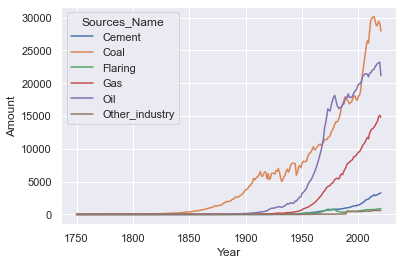

In [4]:
#seaborn line plot. 
sns.set_theme(style="darkgrid")
sns.lineplot(x = "Year",y="Amount",hue ="Sources_Name", data = df)

In [5]:
#Executing Sql Stored procedure on Python code example
df = pd.read_sql_query("EXECUTE GetRegionStats 3,''", conn)
df.head()

,Amount_Emitted,Year,Gas_Name
0,18.702,1750,carbon dioxide (CO2)
1,18.702,1751,carbon dioxide (CO2)
2,18.708,1752,carbon dioxide (CO2)
3,18.708,1753,carbon dioxide (CO2)
4,18.716,1754,carbon dioxide (CO2)


<AxesSubplot:xlabel='Year', ylabel='Amount_Emitted'>

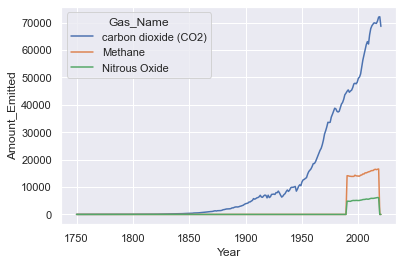

In [6]:
#seaborn line plot. 
sns.set_theme(style="darkgrid")
sns.lineplot(x = "Year",y="Amount_Emitted",hue ="Gas_Name", data = df)

> ### Data visualization and processing using Python.

We are going to use pandas and NumPy  for data processing and panel ([Getting Started — Panel v0.13.1 (holoviz.org)](https://panel.holoviz.org/getting_started/index.html))  for visualizations. Thank to, Thu Vu,  [(106) How to Create a Beautiful Python Visualization Dashboard With Panel/Hvplot - YouTube](https://www.youtube.com/watch?v=uhxiXOTKzfs&t=305s), for the greate video where I learned about panel for data visualization.

We will start by creating Widgets using Panel
In the above test example we have used both SQL queries and Stored procedure to extract data frame 

In [7]:
#we get max and min year form our db
#max year
max_year = pd.read_sql_query("EXECUTE GetWidgetsData 0,''", conn)
end_yaer = max_year['max_year'].values[0]

#Min Year
min_year = pd.read_sql_query("EXECUTE GetWidgetsData 1,''", conn)
start_year = min_year['min_year'].values[0]

#we create a year slider based on the max and min years
year_slider = pn.widgets.IntSlider(name='Year slider', start=int(start_year), end=int(end_yaer), step=5, value=2020)
year_slider

IntSlider(end=2020, name='Year slider', start=1750, step=5, value=2020)

In [8]:
# We get all gases and their IDs
pd_gases=pd.read_sql_query("EXECUTE GetWidgetsData 2,''", conn)

#We convert our Dataframe to Dic
dic_list = pd.Series(pd_gases.Gas_Name.values,index =pd_gases.Gas_Name).to_dict()

#We load the Dic to our Select with IDs as values
gas_select = pn.widgets.Select(name='Gases', options=dic_list)
gas_select

Select(name='Gases', options={'carbon dioxide (CO2)': '...}, value='carbon dioxide (CO2)')

In [9]:
# We get all Sources of CO2 and their IDs
pd_CO2_Sources=pd.read_sql_query("EXECUTE GetWidgetsData 3,''", conn)

#We convert our Dataframe to Dic
dic_list = pd.Series(pd_CO2_Sources.Source_ID.values,index =pd_CO2_Sources.Sources_Name).to_dict()

#We load the Dic to our Select with IDs as values
sources_select = pn.widgets.Select(name='CO2 Source', options=dic_list)
sources_select

Select(name='CO2 Source', options={'Cement': 44, ...}, value=44)

In [10]:
# We get all Countries and their IDs
pd_Countries=pd.read_sql_query("EXECUTE GetWidgetsData 4,''", conn)

#We convert the countries into a list
Countries_list  = list(pd_Countries['Country_Name'])
Countries_select = pn.widgets.AutocompleteInput(
    name='Countries', 
    options=Countries_list,
    placeholder='Enter Name of the country')
Countries_select

AutocompleteInput(name='Countries', options=['Afghanistan', ...], placeholder='Enter Name of t...)

In [11]:
pd_Country_stas=pd.read_sql_query("EXECUTE GetCountryGreenHouseGases 0,''", conn)


In [12]:
Ipd_Country_stas = pd_Country_stas.interactive()


Country_gas_emission_pipe = (Ipd_Country_stas[
    (Ipd_Country_stas.Year <= year_slider ) 
    & (Ipd_Country_stas.Country_Name == Countries_select ) 
    & (Ipd_Country_stas.Gas_ID == gas_select)
]
                             .groupby(['Country_Name','Year','Gas_ID'])['Amount']
                             .sum()
                             .to_frame()
                             .reset_index()
                             .sort_values(by='Year')  
                             .reset_index(drop=True)

                            )

In [13]:
Country_gas_emission_pipe = (Ipd_Country_stas[
    (Ipd_Country_stas.Year <= year_slider ) 
    & (Ipd_Country_stas.Country_Name == Countries_select )
   
]
                             .groupby(['Country_Name','Year','Gas_Name'])['Amount']
                             .sum()
                             .to_frame()
                             .reset_index()
                             .sort_values(by='Year')  
                             .reset_index(drop=True)

                            )

In [14]:
Gas_emission_table = Country_gas_emission_pipe.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
Gas_emission_table

In [18]:
Gas_Emission_bar_plot = Country_gas_emission_pipe.hvplot(kind='line', 
                                                     x='Year', 
                                                     y='Amount', 
                                                     title='Gas Emission',
                                                     by='Gas_Name',
                                                    )

In [19]:
Gas_Emission_bar_plot

In [20]:
pd_CO2_sources_Country = pd.read_sql_query("EXECUTE GetCO2ByDifferentSourcesPerCountry '3','1','Kenya'", conn)

In [21]:
IP_CO2_sources_Country = pd_CO2_sources_Country.interactive()

In [22]:
CO2_sources_Country_pipe = (IP_CO2_sources_Country[
    (Ipd_Country_stas.Year <= year_slider ) 
    & (Ipd_Country_stas.Country_Name == Countries_select )
   
]
                             .groupby(['Sources_Name','Year','Country_Name','Gas_Name'])['Amount']
                             .sum()
                             .to_frame()
                             .reset_index()
                             .sort_values(by='Year')  
                             .reset_index(drop=True)

                            )

In [23]:
CO2_sources_table = CO2_sources_Country_pipe.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
CO2_sources_table

In [24]:
CO2_sources_bar_plot = CO2_sources_Country_pipe.hvplot(kind='line', 
                                                     x='Year', 
                                                     y='Amount', 
                                                     title='Sources of CO2',
                                                     by='Sources_Name',
                                                    )

In [25]:
CO2_sources_bar_plot

In [26]:
country = Countries_select

In [27]:
pd_Country_greenhouse_gases = pd.read_sql_query("EXECUTE GetCountryGreenHouseGases 0,'' ", conn)

In [28]:
IP_pd_Country_greenhouse_gases = pd_Country_greenhouse_gases.interactive()

In [29]:
Country_greenhouse_gases_pipeline = (IP_pd_Country_greenhouse_gases[
    (Ipd_Country_stas.Year <= year_slider ) 
    & (Ipd_Country_stas.Country_Name == Countries_select )
   
]
                             .groupby(['Year','Country_Name','Gas_Name'])['Amount']
                             .sum()
                             .to_frame()
                             .reset_index()
                             .sort_values(by='Year')  
                             .reset_index(drop=True)

                            )

In [30]:
Country_greenhouse_gases_table = Country_greenhouse_gases_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
Country_greenhouse_gases_table

In [31]:
co2_source_bar_plot = Country_greenhouse_gases_pipeline.hvplot(kind='bar', 
                                                     x='Gas_Name', 
                                                     y='Amount', 
                                                     title='CO2 source by continent')

In [32]:
co2_source_bar_plot

In [33]:
#Layout using Template
template = pn.template.FastListTemplate(
    title='World CO2 emission dashboard', 
    sidebar=[pn.pane.Markdown("# CO2 Emissions and Climate Change"), 
             pn.pane.Markdown("#### Carbon dioxide emissions are the primary driver of global climate change. It’s widely recognised that to avoid the worst impacts of climate change, the world needs to urgently reduce emissions. But, how this responsibility is shared between regions, countries, and individuals has been an endless point of contention in international discussions."), 
            
             pn.pane.Markdown("## Settings"),   
             year_slider],
    main=[pn.Row(pn.Column(Countries_select, 
                           Gas_Emission_bar_plot.panel(width=700), margin=(0,25)), Gas_emission_table.panel(width=500)), 
          pn.Row(pn.Column(CO2_sources_bar_plot.panel(width=600), margin=(0,25)), 
                 pn.Column(co2_source_bar_plot.panel(width=600)))],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
# template.show()
template.servable();